# Week 5: Probability Distributions

In [1]:
# Loading the libraries
import numpy as np
import sympy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## Days 2 and 3: Some Special Probability Distributions

* Previously we have introduced the concept of a **random variable**, and the concept of **probability distribution** (via the *probability mass function* /pmf/ and *probability densiti function* /pdf/)
* Now we talk about some probability distributions that frequently appear in the study of statistics and machine learning 

### Constucting Random Variables from scratch using `scipy.stats`
* First order of business will be to learn how to construct a random variable from scratch using only values and probabilities
* To illustrate the process, we will use two examples from before. The data is provided below

### Example 1: Discrete Variables
Recall the example about supplying refurbished computers to a client. The random variable $L$ - total loss - is given in the following table.

| $k$ | \$0 | \$100 | \$1000|
|:---:|:---:|:-----:|:-----:|
|$P(L=k)$|0.528 | 0.416 | 0.056|

* Construct the variable `comp_loss` as a `scipy.stats` object
* Visualize its distribution on a bar graph
* Calculate: $E(L)$, $Var(L)$, $\sigma_L$

In [2]:
# Use scipy.stats.rv_discrete()
vals = [0, 100, 1000]
probs = [0.528, 0.416, 0.056]

comp_loss = stats.rv_discrete(values=(vals,probs))

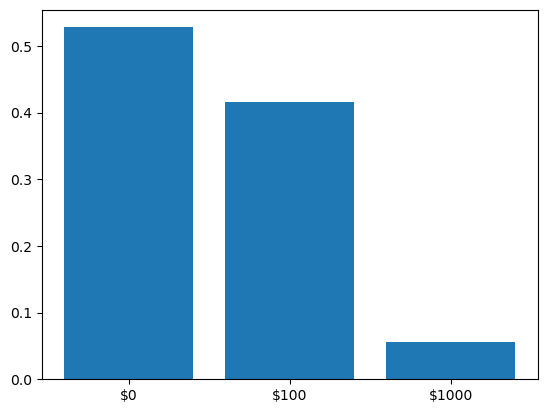

In [3]:
plt.figure()
plt.bar(['$0', '$100', '$1000'], comp_loss.pmf(vals))
plt.show()

In [4]:
comp_loss.pmf(vals)

array([0.528, 0.416, 0.056])

In [5]:
print('E(L) = ', comp_loss.mean())
print('Var(L) = ', comp_loss.var())
print('sigma_L = ', comp_loss.std())

E(L) =  97.6
Var(L) =  50634.240000000005
sigma_L =  225.02053239649044


### Example 2: Continuous Variables
Recall the continuous random variable $X$ given in **Example 4** from the previous lecture. $X$ is a random variable such that $X \in [0, 1]$, and the pdf is given by
\begin{equation}f(x) = \frac{15}{2} x^2 (1-x^2)\end{equation}
* Construct a `scipy.stats.rv_continuous` object named `x_rv` for a random variable $X$
* Visualize $X$'s pdf
* Find the probability $P(0.5 \leqslant X \leqslant 0.8)$
* Calculate $E(X)$ and $\sigma_X$

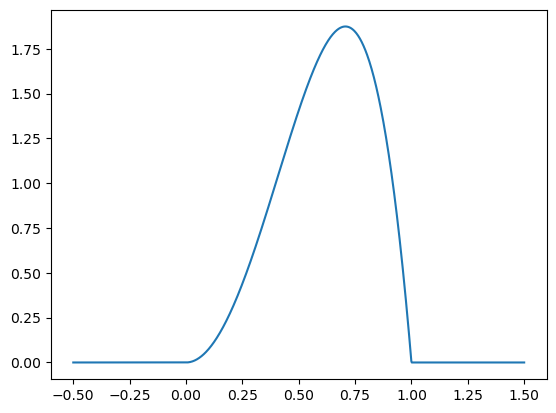

In [6]:
# use scipy.stats.rv_continuous()
# first build a generator class with custom _pdf()
class x_rv_generator(stats.rv_continuous):
    def _pdf(self,x):
        return 7.5 * x**2 * (1-x**2)

x_rv = x_rv_generator(a=0, b=1)

xs = np.linspace(-0.5, 1.5, 1000)
plt.figure()
plt.plot(xs, x_rv.pdf(xs))
plt.show()

In [7]:
print('P(0.5 <= X <= 0.8) = ', x_rv.cdf(0.8) - x_rv.cdf(0.5))
print('E(X) = ', x_rv.mean())
print('sigma_X = ', x_rv.std())

P(0.5 <= X <= 0.8) =  0.5228550000000002
E(X) =  0.6250000000002507
sigma_X =  0.19479843061696428


In [9]:
x_rv.cdf(0.5)

0.265625

### Practice Example 3: Continuous Variables
$Y$ is a random variable such that $Y \in [0, \pi]$, and the pdf is given by
\begin{equation}f(y) = \frac{2\cdot \sin^2 x}{\pi}\end{equation}
* Construct a `scipy.stats.rv_continuous` object named `y_rv` for a random variable $Y$
* Visualize $Y$'s pdf
* Find the probability $P(0.5 \leqslant Y \leqslant 0.8)$ and $P\left(\frac{\pi}{3} \leqslant Y \leqslant \frac{3\pi}{4}\right)$
* Calculate $E(Y)$ and $\sigma_Y$

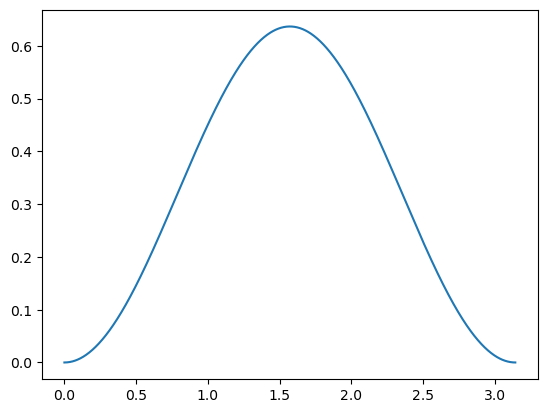

P(0.5 <= X <= 0.8) = 3228480.09838302


C:\Users\Ivan\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2060: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  return integrate.quad(self._pdf, _a, x, args=args)[0]
C:\Users\Ivan\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2060: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return integrate.quad(self._pdf, _a, x, args=args)[0]


In [1]:
# Loading the libraries
import numpy as np
import sympy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# use scipy.stats.rv_continuous() and np.pi
class f(stats.rv_continuous):
    def _pdf(self, x):
        return (2 * (np.sin(x)) ** 2) / np.pi

y_rv = f(name='pdf')

ys = np.linspace(0, np.pi, 1000)
plt.figure()
plt.plot(ys, y_rv.pdf(ys))
plt.show()

# P(0.5 <= X <= 0.8):
print(f"P(0.5 <= X <= 0.8) = {y_rv.cdf(np.pi/3) - y_rv.cdf(3 * np.pi / 4)}")

In [30]:
y_rv.cdf(0.5)

5036.071837167222

In [7]:
x = sp.Symbol('x')

f = 2 * (sp.sin(x)) ** 2 / sp.pi

P = lambda a, b: sp.integrate(f, (x, a, b)).evalf()

P(0.5, 0.8)

0.0703301526474876

---

# Continuation (Week 5 Workshop)

### Binomial Distribution
Recall the example with the couple who planned on having three children. Problems of this and similar nature appear quite frequently. The undelying commonalities for this class of problems are:
* There is a fixed, predetermined number of independent trials/observations, usually labeled by $n$
* All trials have only two outcomes: either *success* or *failure*
* The probability of observing a success in each of the trials is fixed in all trials, and is usually labeled by $p$

These three properties describe what is known as **Binomial Setting** which can universally be described using a single probability distribution function called **Binomial Distribution**. The binomial distribution has two *parameters*: the number of trials $n$, and the probability of success in each trial, $p$. If a random variable $X$ **counts the number of successes in the series of trials**, then it follows a binomial distribution with parameters $n$ and $p$, the we write:
\begin{equation} X \sim \mathcal{B}(n, p) \end{equation}
For such a discrete random variable $X \in \{0, 1, \ldots, n  \}$ and the pmf is given by:
\begin{equation} P(X = k) = {n \choose k}p^k (1-p)^{n-k} \end{equation}
where ${n \choose k} = \frac{n!}{k! ~ (n-k)!}$ is called **binomial coefficient** (read: "$n$ choose $k$") and $!$ after a number denotes the factoral of the number, e.g. $5! = 5 \cdot 4 \cdot 3 \cdot 2 \cdot 1$. The binomial coefficient tells you in how many ways you can choose a group of size $k$ if your pool of choices is of size $n$.

### Example 4: Binomial Distribution
Each offspring hatched from a particular type of reptile has probability 0.2 of surviving for at least one week. If 6 offspring of these reptiles are hatched, find the probability that:
* Exactly 2 of the 6 will survive for at least one week
* At most 2 of the 6 will survive for at least one week
* At least 3 of the 6 will survive for at least one week

In [29]:
# Use scipy.stats.binom()
n, p = 6, 0.2

# Define the random variable X ~ B(n, p):
X = stats.binom(n, p)

print(f"X ~ B({n}, {p})\n")

# Exactly 2 of the 6 will survive for at least one week
print(f"P(X = 2) = {X.pmf(2)}\n")

# At most 2 of the 6 will survive for at least one week
print(f"P(X <= 2) = P(X = 0) + P(X = 1) + P(X = 2) = {X.cdf(2)}\n")
print(f"P(X <= 2) = P(X = 0) + P(X = 1) + P(X = 2) = {X.pmf(0) + X.pmf(1) + X.pmf(2)}\n")

# At least 3 of the 6 will survive for at least one week
print(f"P(X >= 3) = P(X = 3) + P(X = 4) + P(X = 6) = {1 - X.cdf(2)}\n")
print(f"P(X >= 3) = P(X = 3) + P(X = 4) + P(X = 6) = {1 - (X.pmf(0) + X.pmf(1) + X.pmf(2))}\n")

# Alternatively


X ~ B(6, 0.2)

P(X = 2) = 0.2457600000000002

P(X <= 2) = P(X = 0) + P(X = 1) + P(X = 2) = 0.9011199999999999

P(X <= 2) = P(X = 0) + P(X = 1) + P(X = 2) = 0.9011200000000004

P(X >= 3) = P(X = 3) + P(X = 4) + P(X = 6) = 0.09888000000000008

P(X >= 3) = P(X = 3) + P(X = 4) + P(X = 6) = 0.09887999999999963



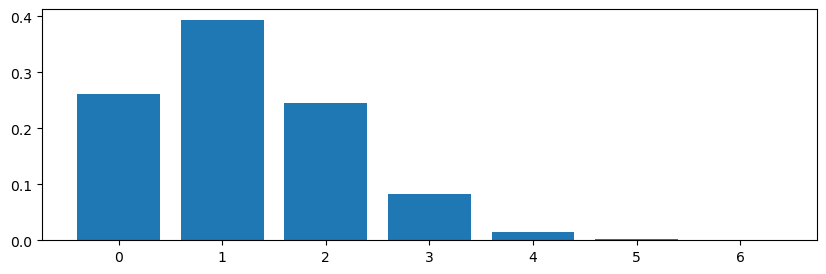

In [18]:
# Plot the Binomial Distribution for the example:

fig = plt.figure(figsize=(10, 3))

xs = [k for k in range(n + 1)]
ys = [X.pmf(k) for k in range(n + 1)]

plt.bar(xs, ys)

plt.show()

In [25]:
df = pd.DataFrame(columns=xs, index=['P(X = k)'])

for k in range(n + 1): df[k] = ys[k]

df

,0,1,2,3,4,5,6
P(X = k),0.262144,0.393216,0.24576,0.08192,0.01536,0.001536,0.000064


### Practice Example 5: Binomial Distribution
The Census Bureau's Current Population Survey shows 28% of individuals, ages 25 and older, have completed four years of college (this is 2006 data). For a random sample of 15 individuals, ages 25 and older:
* What is the probability 4 will have completed four years of college?
* What is the probability 3 or more will have completed four years of college?

In [50]:
# Print intro
print('X = # of people in the sample who have completed college')
print('X ~ B(15, 0.28)')
n, p = 15, 0.28
X = stats.binom(n, p)

xs = [k for k in range(n + 1)]
ys = [round(X.pmf(k), 6) for k in range(n + 1)]

df = pd.DataFrame(columns=xs, index=['P(X = k)'])
for k in range(n + 1): df[k] = ys[k]

df

X = # of people in the sample who have completed college
X ~ B(15, 0.28)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
P(X = k),0.007244,0.042258,0.115034,0.193854,0.226163,0.193495,0.125414,0.062707,0.024386,0.007376,0.001721,0.000304,0.000039,0.000004,0.0,0.0


In [51]:
X1 = stats.binom(n, 0.4)

ys1 = [round(X1.pmf(k), 5) for k in range(n + 1)]

df1 = pd.DataFrame(columns=xs, index=['P(X = k)'])
for k in range(n + 1): df1[k] = ys1[k]

df1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
P(X = k),0.00047,0.0047,0.02194,0.06339,0.12678,0.18594,0.2066,0.17708,0.11806,0.06121,0.02449,0.00742,0.00165,0.00025,0.00002,0.0


In [60]:
X2 = stats.binom(n, 0.7)

ys2 = [round(X2.pmf(k), 4) for k in range(n + 1)]

df2 = pd.DataFrame(columns=xs, index=['P(X = k)'])
for k in range(n + 1): df2[k] = ys2[k]

df2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
P(X = k),0.0,0.0,0.0,0.0001,0.0006,0.003,0.0116,0.0348,0.0811,0.1472,0.2061,0.2186,0.17,0.0916,0.0305,0.0047


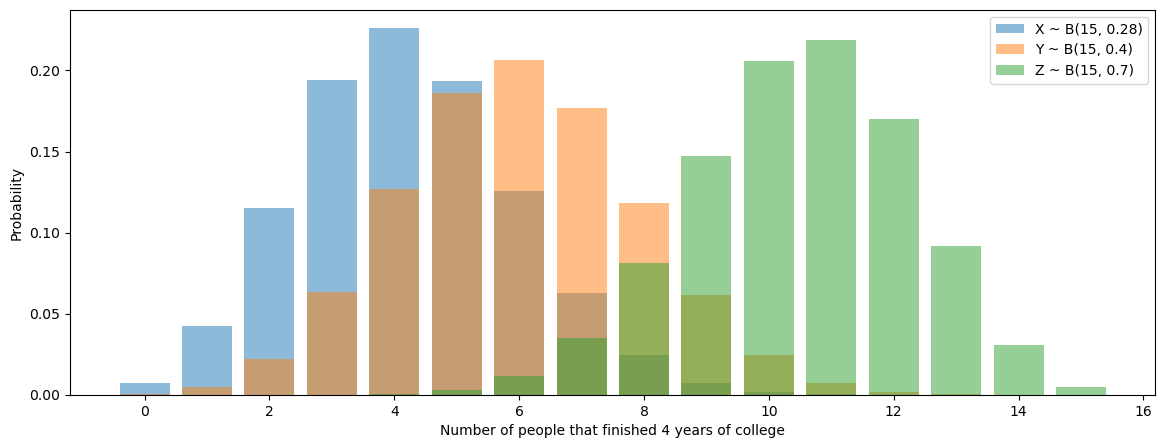

In [61]:
#visualize
ks = np.arange(0, 16)

plt.figure(figsize=(14,5))
plt.bar(ks, X.pmf(ks), alpha=0.5, label = 'X ~ B(15, 0.28)')
plt.bar(ks, X1.pmf(ks), alpha=0.5, label = 'Y ~ B(15, 0.4)')
plt.bar(ks, X2.pmf(ks), alpha=0.5, label = 'Z ~ B(15, 0.7)')
plt.xlabel('Number of people that finished 4 years of college')
plt.ylabel('Probability')
plt.legend()
plt.show()

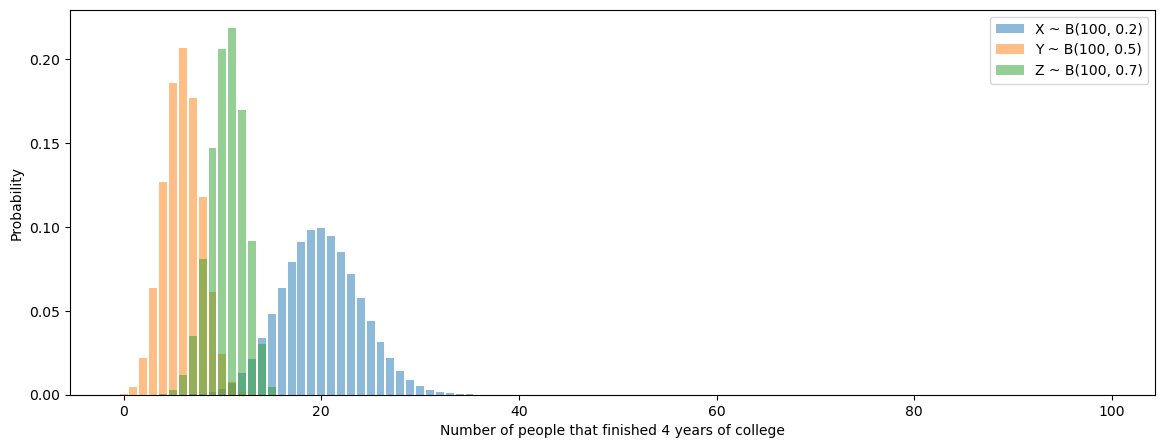

In [79]:
n, p = 100, 0.5

# X
X = stats.binom(n, 0.2)

x_axis = [k for k in range(n + 1)]
y_axis = [X.pmf(k) for k in range(n + 1)]

df_X = pd.DataFrame(columns=x_axis, index=['P(X = k)'])
for k in range(n + 1): df_X[k] = y_axis[k]

# Y
Y = stats.binom(n, 0.5)

x_axis = [k for k in range(n + 1)]
y_axis = [Y.pmf(k) for k in range(n + 1)]

df_Y = pd.DataFrame(columns=x_axis, index=['P(X = k)'])
for k in range(n + 1): df_Y[k] = y_axis[k]
    
# Z
Z = stats.binom(n, 0.7)

x_axis = [k for k in range(n + 1)]
y_axis = [Z.pmf(k) for k in range(n + 1)]

df_Z = pd.DataFrame(columns=x_axis, index=['P(X = k)'])
for k in range(n + 1): df_Z[k] = y_axis[k]

#visualize
ks = np.arange(0, n)

plt.figure(figsize=(14,5))
plt.bar(ks, X.pmf(ks), alpha=0.5, label = f'X ~ B({n}, 0.2)')
plt.bar(ks, X1.pmf(ks), alpha=0.5, label = f'Y ~ B({n}, 0.5)')
plt.bar(ks, X2.pmf(ks), alpha=0.5, label = f'Z ~ B({n}, 0.7)')
plt.xlabel('Number of people that finished 4 years of college')
plt.ylabel('Probability')
plt.legend()
plt.show()

In [44]:
# What is the probability 4 will have completed four years of college?
print('P(X = 4) = ', X.pmf(4))

# What is the probability 3 or more will have completed four years of college?
print('P(X >= 3) = ', 1 - X.cdf(2))

P(X = 4) =  0.2261633547176571
P(X >= 3) =  0.835463884777257


### Normal Distribution
The **Normal Distribution** goes by many names, and most people have heard about it. It is also known as **Gaussian Distribution** or **Bell-Curve**. The normal distribution has two parameters: the *location* parameter which is defined by the **mean** $\mu$ of the distribution (and is the most likely outcome), and the *scale* parameter which is defined by the **variance** $\sigma^2$ or **standard deviation** $\sigma$ of the distribution (which determines the horizontal stretch of the distribution). If a random variable $X$ follows a normal distribution with mean $\mu$ and standard deviation $\sigma$, we write:
\begin{equation} X \sim \mathcal{N}(\mu, \sigma) \end{equation}
For any such random variable, $X \in (-\infty, \infty)$ and the pdf is given by:
\begin{equation} f(x \mid \mu, \sigma) = \displaystyle \frac{1}{\sqrt{2\pi}\cdot \sigma}~\exp\left( {-\frac{1}{2} ~ \left( \frac{x - \mu}{\sigma} \right)^2} \right) \end{equation}

Every Normal distribution has a unique definiing property known as **68-95-99.7 Rule** or **Empirical Rule** which relates the mean, the standard deviation, and the normal probabilities:
\begin{equation}
\begin{array}{rcl}
P \big(\mu - \sigma \leqslant X \leqslant \mu + \sigma \big) &\approx& 0.68\\
P \big(\mu - 2\sigma \leqslant X \leqslant \mu + 2\sigma \big) &\approx& 0.95\\
P \big(\mu - 3\sigma \leqslant X \leqslant \mu + 3\sigma \big) &\approx& 0.997
\end{array}
\end{equation}
In other words: only the outcomes which are **within 3 standard deviations of the mean** are relevant, all other outcomes occur so rarely that they can, most frequently, be disregarded.

### Example 6: Normal Distribution
The weights of babies born at Prince Louis Maternity Hospital last year averaged $\mu = 3.0$ kg with a standard deviation of $\sigma = 200$ grams.
* Visualize the distribution in the range $[\mu - 4\sigma, \mu + 4\sigma]$
* What is the probability that a randomly selected baby born at the hospital weighs less than 3.2 kg?
* If there were 545 babies born at this hospital last year, estimate the number of babies that weighed between 2.8 kg and 3.4 kg
* Find the weight $w$ such that 40% of babies weigh less than $w$

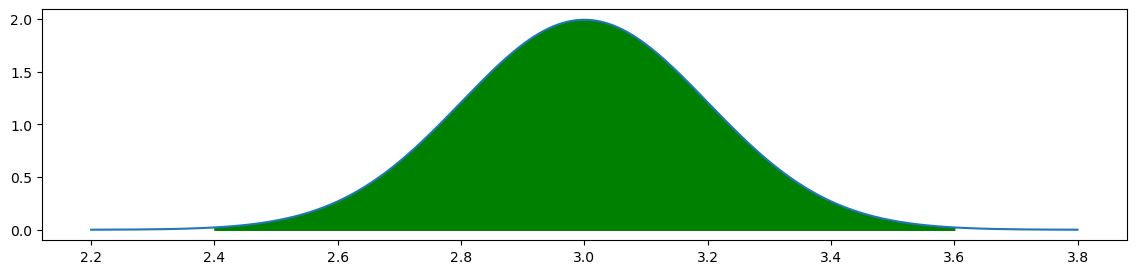

In [99]:
# use scipy.stats.norm()
mu, sigma = 3, 0.2
X = stats.norm(mu, sigma)

# Visualize the distribution
plt.figure(figsize=(14, 3))

xs = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 1000)
ys = [X.pdf(x) for x in xs]

plt.plot(xs, ys)

a, b = 2.4, 3.6
x_fill = np.linspace(a, b, 1000)
y_fill = [X.pdf(x) for x in x_fill]

plt.fill_between(x_fill, y_fill, color='green')

plt.show()

P(X <= 3.2) = 0.8413447460685431



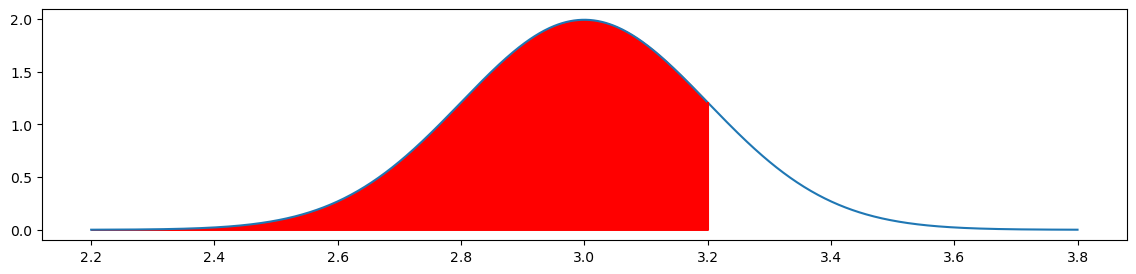

In [108]:
# use scipy.stats.norm()
mu, sigma = 3, 0.2
X = stats.norm(mu, sigma)

# Visualize the distribution
plt.figure(figsize=(14, 3))

xs = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 1000)
ys = [X.pdf(x) for x in xs]

plt.plot(xs, ys)

plt.vlines(3.2, 0, X.pdf(3.2), color='red')

print(f"P(X <= 3.2) = {X.cdf(3.2)}\n")

a, b = 2.2, 3.2
x_fill = np.linspace(a, b, 1000)
y_fill = [X.pdf(x) for x in x_fill]
plt.fill_between(x_fill, y_fill, color='red')

plt.show()

P(2.8 <= X <= 3.4) = 0.8185946141203639



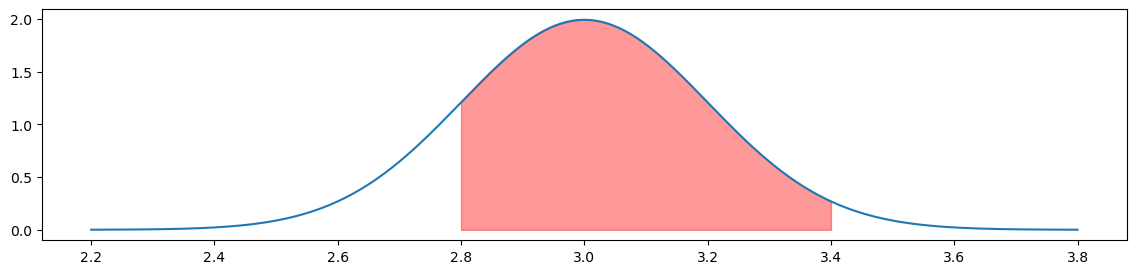

In [117]:
# use scipy.stats.norm()
mu, sigma = 3, 0.2
X = stats.norm(mu, sigma)

# Visualize the distribution
plt.figure(figsize=(14, 3))

xs = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 1000)
ys = [X.pdf(x) for x in xs]

plt.plot(xs, ys)

# plt.vlines(3.2, 0, X.pdf(3.4), color='red')

print(f"P(2.8 <= X <= 3.4) = {X.cdf(3.4) - X.cdf(2.8)}\n")

a, b = 2.8, 3.4
x_fill = np.linspace(a, b, 1000)
y_fill = [X.pdf(x) for x in x_fill]
plt.fill_between(x_fill, y_fill, color='red', alpha=0.4)

# a, b = 2.2, 2.8
# x_fill = np.linspace(a, b, 1000)
# y_fill = [X.pdf(x) for x in x_fill]
# plt.fill_between(x_fill, y_fill, color='blue', alpha=0.4)

# a, b = 2.2, 3.4
# x_fill = np.linspace(a, b, 1000)
# y_fill = [X.pdf(x) for x in x_fill]
# plt.fill_between(x_fill, y_fill, color='green', alpha=0.4)

plt.show()

In [120]:
# If there were 545 babies born at this hospital last year, estimate the number of babies that weighed between 2.8 kg and 3.4 kg
print(f"P(2.8 <= X <= 3.4) = {X.cdf(3.4) - X.cdf(2.8)}\n")
print(f"# of babies that weight between 2.8 kgs and 3.4kgs = {int(545 * (X.cdf(3.4) - X.cdf(2.8)))}\n")

P(2.8 <= X <= 3.4) = 0.8185946141203639

# of babies that weight between 2.8 kgs and 3.4kgs = 446



P(X <= w) = 0.4

w = 2.94933057937284

Proverka : P(X <= 2.94933057937284) = 0.40000000000000024


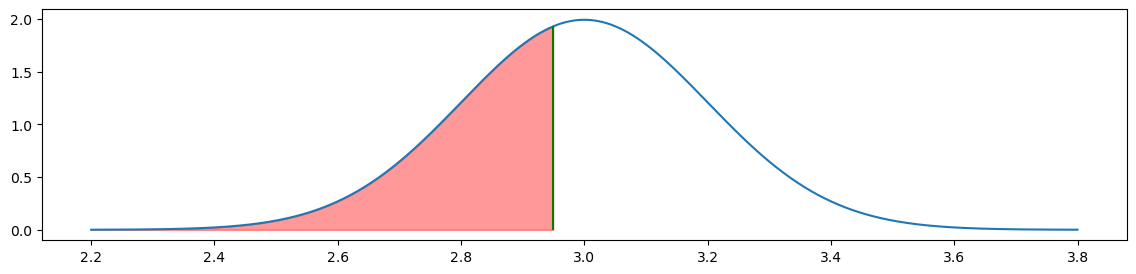

In [129]:
# Find the weight w such that 40% of babies weigh less than w
# use scipy.stats.norm()
mu, sigma = 3, 0.2
X = stats.norm(mu, sigma)

# Visualize the distribution
plt.figure(figsize=(14, 3))

xs = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 1000)
ys = [X.pdf(x) for x in xs]

plt.plot(xs, ys)

print(f"P(X <= w) = 0.4\n")
print(f"w = {X.ppf(0.4)}\n")
w = X.ppf(0.4)

print(f"Proverka : P(X <= {w}) = {X.cdf(w)}")

plt.vlines(w, 0, X.pdf(w), color='green')

a, b = 2.2, w
x_fill = np.linspace(a, b, 1000)
y_fill = [X.pdf(x) for x in x_fill]
plt.fill_between(x_fill, y_fill, color='red', alpha=0.4)

plt.show()

### Example 7: Normal Distribution
The heights of a group of students are normally distributed with a mean of 160 cm and a standard deviation of 20 cm.
* A student is chosen at random. Find the probability that the student’s height is greater than 180 cm.
* In this group of students, 11.9% have heights less than $d$ cm. Find the value of $d$.

In [147]:
def plot_norm_dist(X):
    mu, sigma = X.mean(), X.std()
    
    xs = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 1000)
    ys = [X.pdf(x) for x in xs]
    
    plt.figure(figsize=(12, 2))
    plt.plot(xs, ys)

def fill_between(X, a, b):
    mu, sigma = X.mean(), X.std()
    
    xs = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 1000)
    ys = [X.pdf(x) for x in xs]
    
    plt.figure(figsize=(12, 2))
    plt.plot(xs, ys)
    
    x_fill = np.linspace(a, b, 1000)
    y_fill = [X.pdf(x) for x in x_fill]
    plt.fill_between(x_fill, y_fill, color='red', alpha=0.4)

# P(X <= c)
P = lambda X, c: X.cdf(c) 

# P(X <= d) = p, d = ?:
inv_P = lambda X, p: X.ppf(p)

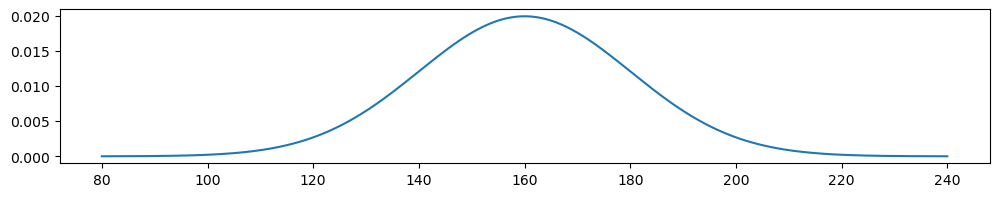

In [156]:
mu, sigma = 160, 20

X = stats.norm(mu, sigma)

plot_norm_dist(X)

P(X >= 180) = 0.15865525393145707



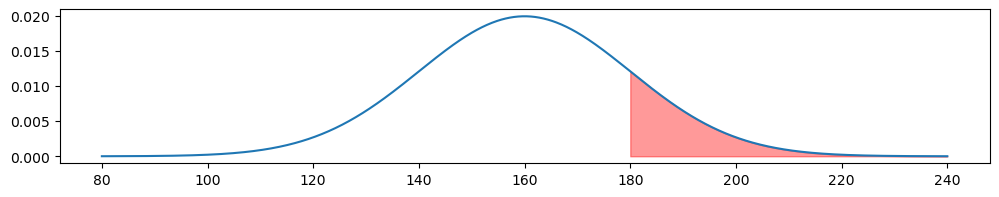

In [149]:
# A student is chosen at random. Find the probability that the student’s height is greater than 180 cm.
fill_between(X, 180, 240)

print(f"P(X >= 180) = {1 - P(X, 180)}\n")

P(X <= d) = 0.119

d = 136.39998919304543


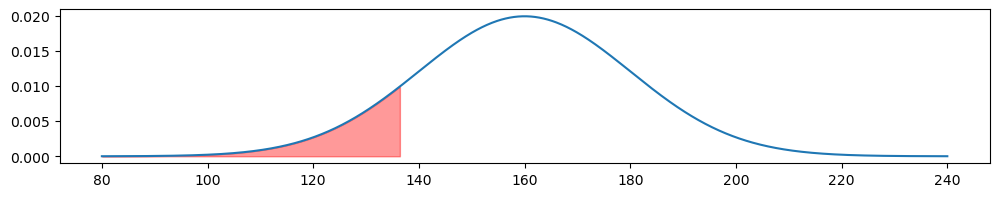

In [152]:
# In this group of students, 11.9% have heights less than d cm. Find the value of d.
print(f"P(X <= d) = 0.119\n")
print(f"d = {inv_P(X, 0.119)}")

d = inv_P(X, 0.119)

fill_between(X, 80, d)

In [153]:
P(X, 136.3999)

0.11899911314253697

---

In [164]:
x = np.array([7, 7.5, 8, 8.3, 9, 10, 11])

z = (x - x.mean()) / x.std()

z.mean(), z.std()

(6.661338147750939e-16, 1.0)

In [165]:
(4.7 / 140) * (900 - 1020) + 21

16.97142857142857

In [166]:
-0.86 * 4.7 + 21

16.958